<a href="https://colab.research.google.com/github/mhdykz/predict-student-GPA-using-a-neural-network/blob/main/student_GPA_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [245]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam



In [246]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

X_test = test_data.drop(columns=['StudentID', 'GPA'])
y_test = test_data['GPA']

categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport',
                       'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
numerical_columns = ['Age', 'StudyTimeWeekly', 'Absences']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])



In [247]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_train_preprocessed.shape, X_val_preprocessed.shape

X_test_preprocessed = preprocessor.transform(X_test)


y_pred = model.predict(X_test_preprocessed)





12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [248]:
model = models.Sequential()

model.add(layers.InputLayer(input_shape=(X_train_preprocessed.shape[1],)))

model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.45))

model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.45))

model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.45))

model.add(layers.Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [249]:
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='mean_squared_error')


In [250]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

history = model.fit(X_train_preprocessed, y_train, validation_data=(X_val_preprocessed, y_val),
                    epochs=2000, batch_size=256, callbacks=[early_stopping])



Epoch 1/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 6.3966 - val_loss: 4.0301
Epoch 2/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.8438 - val_loss: 4.1222
Epoch 3/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.5463 - val_loss: 4.2153
Epoch 4/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.1636 - val_loss: 4.2883
Epoch 5/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.2256 - val_loss: 4.3599
Epoch 6/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.1043 - val_loss: 4.4007
Epoch 7/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.8922 - val_loss: 4.4321
Epoch 8/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.8824 - val_loss: 4.4587
Epoch 9/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.9395 - val_loss: 4.4701
Epoch 10/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.6536 - val_loss: 4.4794
Epoch 11/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.7496 - val_loss: 4.4923
Epoch 12/2000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.7

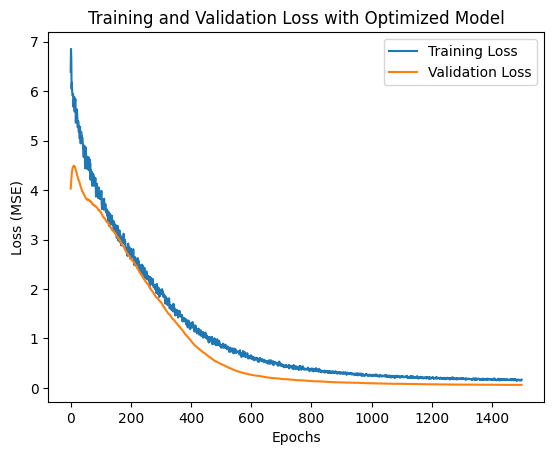

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Optimized R² Score on Test Data: 0.926555873525032


In [251]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with Optimized Model')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

from sklearn.metrics import r2_score


y_pred = model.predict(X_test_preprocessed)
r2 = r2_score(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f'Optimized R² Score on Test Data: {r2}')